In [1]:
#%pip install category_encoders
#%pip install nltk

In [2]:
# импортируем основные библиотеки
import numpy as np
import pandas as pd
import category_encoders as ce

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
hotels = pd.read_csv('data\hotels.csv')
hotels.head(5)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [4]:
# Выведем информацию о датафрейме
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [5]:
# Выведем статистические сведения о датафрейме
hotels.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
count,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.00000,386803.000000,384355.000000,384355.000000
mean,498.246536,8.397231,18.538988,2743.992042,17.776985,7.17725,8.396906,49.443522,2.823402
std,500.258012,0.547881,29.703369,2316.457018,21.726141,11.05442,1.636090,3.466936,4.579043
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.00000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.00000,7.500000,48.214662,-0.143649
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.00000,8.800000,51.499981,-0.000250
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.00000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.00000,10.000000,52.400181,16.429233


## Поработаем со строковыми значениями

In [6]:
# Преобразуем review_date в формат DateTime. Создадим новые признаки: год, квартал, месяц, день и день недели даты отзыва.
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
hotels['review_year'] = hotels['review_date'].dt.year
hotels['review_season'] = hotels['review_date'].dt.quarter
hotels['review_month'] = hotels['review_date'].dt.month
hotels['review_day'] = hotels['review_date'].dt.day
hotels['review_dayofweek'] = hotels['review_date'].dt.dayofweek

# Выведем информацию, когда был оставлен самый свежий и самый первый отзыв.
print(hotels['review_date'].min())
print(hotels['review_date'].max())

hotels.head(5)

2015-08-04 00:00:00
2017-08-03 00:00:00


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,reviewer_score,tags,days_since_review,lat,lng,review_year,review_season,review_month,review_day,review_dayofweek
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,2016,1,2,19,4
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,2017,1,1,12,3
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,2016,4,10,18,1
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540,2015,3,9,22,1
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060,2016,1,3,5,5


In [7]:
# Удаляем не нужный столбец
hotels.drop(['review_date'],axis=1,inplace=True)
print(hotels.shape)

(386803, 21)


In [8]:
# Признак days_since_review переведём в числовой удалив слова day и days и поменяем тип данных на int.
hotels['days_since_review'] = hotels['days_since_review'].str.split().str[0]
hotels['days_since_review'] = hotels['days_since_review'].astype('int')
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 21 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   average_score                               386803 non-null  float64
 3   hotel_name                                  386803 non-null  object 
 4   reviewer_nationality                        386803 non-null  object 
 5   negative_review                             386803 non-null  object 
 6   review_total_negative_word_counts           386803 non-null  int64  
 7   total_number_of_reviews                     386803 non-null  int64  
 8   positive_review                             386803 non-null  object 
 9   review_total_positive_word_counts           386803 non-null  int64  
 

In [9]:
# Выведем информацию, сколько отелей представлено в наборе данных.
len(hotels['hotel_name'].unique())

1492

In [10]:
# Выделим названия стран
def get_countries(country):
    adress_list = country.split(' ')
    if adress_list[-1] == 'Kingdom':
        countries = adress_list[-2]+' '+ adress_list[-1]
    else: countries = adress_list[-1]
    return countries

hotels['country'] = hotels['hotel_address'].apply(get_countries)
display(hotels['country'].value_counts())
print(hotels.shape)

United Kingdom    196774
Spain              45132
France             44830
Netherlands        43006
Austria            29178
Italy              27883
Name: country, dtype: int64

(386803, 22)


In [11]:
# Выделим названия городов
def get_cities(city):
    adress_list = city.split(' ')
    if adress_list[-1] == 'Kingdom':
        cities = adress_list[-5]
    else: cities = adress_list[-2]
    return cities

hotels['city'] = hotels['hotel_address'].apply(get_cities)
display(hotels['city'].value_counts())

# Удаляем не нужный столбец
hotels.drop(['hotel_address'],axis=1,inplace=True)
print(hotels.shape)

London       196774
Barcelona     45132
Paris         44830
Amsterdam     43006
Vienna        29178
Milan         27883
Name: city, dtype: int64

(386803, 22)


In [12]:
# Посмотрим, как пропуски в 'lat' распределяются по городам
print(hotels[hotels['lat'].isnull()].groupby('city', as_index=False).agg(qty=('city', 'count')))

        city   qty
0  Barcelona   159
1      Paris   299
2     Vienna  1990


In [13]:
# Рассчитаем средние значения широты и долготы для каждого города
hotels.groupby('city', as_index=False).agg(mean_lat=('lat', 'mean'), mean_lng=('lng', 'mean'))

,city,mean_lat,mean_lng
0,Amsterdam,52.362209,4.885346
1,Barcelona,41.389125,2.169152
2,London,51.510737,-0.139075
3,Milan,45.479619,9.191844
4,Paris,48.863658,2.326816
5,Vienna,48.203368,16.367176


In [14]:
# заполним пропуски средними значениями для каждого города
hotels.loc[(hotels['city']=='Barcelona') & (hotels['lat'].isnull()), 'lat'] = 41.389125
hotels.loc[(hotels['city']=='Barcelona') & (hotels['lng'].isnull()), 'lng'] = 2.169152

hotels.loc[(hotels['city']=='Paris') & (hotels['lat'].isnull()), 'lat'] = 48.863658
hotels.loc[(hotels['city']=='Paris') & (hotels['lng'].isnull()), 'lng'] = 2.326816

hotels.loc[(hotels['city']=='Vienna') & (hotels['lat'].isnull()), 'lat'] = 48.203368
hotels.loc[(hotels['city']=='Vienna') & (hotels['lng'].isnull()), 'lng'] = 16.367176

hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   hotel_name                                  386803 non-null  object 
 3   reviewer_nationality                        386803 non-null  object 
 4   negative_review                             386803 non-null  object 
 5   review_total_negative_word_counts           386803 non-null  int64  
 6   total_number_of_reviews                     386803 non-null  int64  
 7   positive_review                             386803 non-null  object 
 8   review_total_positive_word_counts           386803 non-null  int64  
 9   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 

In [15]:
# Так долгота Лондона близка к нулю, заменим все отрицательные значения на положительные
hotels['lng'] = hotels['lng'].abs()

In [16]:
# Так как страна представлена только одним городом, закодируем названия городов (страны кодировать не будем)
encoder = ce.OneHotEncoder(cols=['city']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(hotels['city'])
hotels = pd.concat([hotels, type_bin], axis=1)

# Удаляем не нужный столбец
hotels.drop(['city'],axis=1,inplace=True)

hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 27 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   hotel_name                                  386803 non-null  object 
 3   reviewer_nationality                        386803 non-null  object 
 4   negative_review                             386803 non-null  object 
 5   review_total_negative_word_counts           386803 non-null  int64  
 6   total_number_of_reviews                     386803 non-null  int64  
 7   positive_review                             386803 non-null  object 
 8   review_total_positive_word_counts           386803 non-null  int64  
 9   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 

In [17]:
hotels['tags']

0         [' Leisure trip ', ' Couple ', ' Studio Suite ...
1         [' Business trip ', ' Couple ', ' Standard Dou...
2         [' Leisure trip ', ' Solo traveler ', ' Modern...
3         [' Leisure trip ', ' Solo traveler ', ' Standa...
4         [' Business trip ', ' Couple ', ' Standard Dou...
                                ...                        
386798    [' Leisure trip ', ' Group ', ' Club Double or...
386799    [' Leisure trip ', ' Couple ', ' Standard Doub...
386800    [' Business trip ', ' Solo traveler ', ' Singl...
386801    [' Leisure trip ', ' Solo traveler ', ' Deluxe...
386802    [' Leisure trip ', ' Couple ', ' Bunk Bed Room...
Name: tags, Length: 386803, dtype: object

In [18]:
def re_func(num_tags):
    num_tags = num_tags[2:-2]
    res = num_tags.strip().split(' \', \' ')
    return res

hotels['tags'] = hotels['tags'].apply(re_func)
hotels['tags']

0         [Leisure trip, Couple, Studio Suite, Stayed 2 ...
1         [Business trip, Couple, Standard Double Room, ...
2         [Leisure trip, Solo traveler, Modern Double Ro...
3         [Leisure trip, Solo traveler, Standard Room wi...
4         [Business trip, Couple, Standard Double or Twi...
                                ...                        
386798    [Leisure trip, Group, Club Double or Twin Room...
386799    [Leisure trip, Couple, Standard Double Room, S...
386800    [Business trip, Solo traveler, Single Room, St...
386801    [Leisure trip, Solo traveler, Deluxe Double Ro...
386802    [Leisure trip, Couple, Bunk Bed Room, Stayed 4...
Name: tags, Length: 386803, dtype: object

In [18]:
# Посмотрим сколько уникальных тегов представлено в наборе данных? Для этого создадим функцию, которая соберёт все теги из признака 'tags'
# в виде списка списков и в виде словаря.
def collect_tags(df):
    """
    Эта функция собирает информацию о тегах по типу и подсчитывает
    Args:
        df (pandas.DataFrame): input data
    Returns:
        tags_list (list of the lists)
        tags_dict (dictionary)
        
    """
    # Создадим пустой список тегов
    tags_dict = dict()
    tags_list = list()
    
    # Пройдёмся по строкам и индексам
    for idx, row in hotels['tags'].items():
        
        # Извлекём теги из строк
        tags = list(row.replace("[' ", '').replace(" ']", '').split(" ', ' "))
        
        # Заполним список тегов
        tags_list.append(tags)
        for tag in tags:
            if tag not in tags_dict.keys():
                tags_dict.update({tag: 1})
            else:
                tags_dict[tag] += 1
                
    return tags_list, tags_dict


tg_list, tg_dict = collect_tags(hotels)
print(len(tg_dict))
print(tg_list[13:20])

2368
[['Leisure trip', 'Couple', 'Double or Twin Room Non Smoking', 'Stayed 1 night', 'Submitted from a mobile device'], ['Leisure trip', 'Couple', 'Double or Twin Room', 'Stayed 4 nights', 'Submitted from a mobile device'], ['Leisure trip', 'Couple', 'Double or Twin Room', 'Stayed 1 night'], ['Business trip', 'Solo traveler', 'Standard Room', 'Stayed 1 night', 'Submitted from a mobile device'], ['Leisure trip', 'Group', 'Standard Room', 'Stayed 2 nights', 'Submitted from a mobile device'], ['Leisure trip', 'Solo traveler', 'Standard Double Room', 'Stayed 2 nights'], ['Leisure trip', 'Couple', 'Comfort Double or Twin Room', 'Stayed 4 nights']]


In [19]:
# Посмотрим какой тег представлен в наибольшем числе отзывов?
def most_freq_tag(tags):
    """
    Эта функция находит наиболее часто встречающийся тег

    Args:
        df (pandas.DataFrame): input data

    Returns:
        tag: tag value
        count: quantity in dataset
    """
    max_tag = ''
    max_count = 0
    for tag, count in tags.items():
        
        # Пройдём по пунктам
        if count > max_count:
            max_count = count
            max_tag = tag

    return max_tag, max_count

print(most_freq_tag(tg_dict))

('Leisure trip', 313593)


In [20]:
# Посмотрим на сколько ночей чаще всего останавливаются путешественники в отелях?
def most_freq_tag_stayed(tags):
    """
    Эта функция находит наиболее часто встречающийся тег с ключевым словом 'Остался..'
    Args:
        df (pandas.DataFrame): input data

    Returns:
        tag: tag value
        count: quantity in dataset
    """
    max_tag = ''
    max_count = 0
    for tag, count in tags.items():
       
         # Пройдём по пунктам
        if 'stayed' in tag.lower():
            if count > max_count:
                max_count = count
                max_tag = tag

    return max_tag, max_count

print(most_freq_tag_stayed(tg_dict))

('Stayed 1 night', 145373)


In [21]:
# Из тегов выясним, состав путешествующих.
def get_type_of_travalers(tags):    
    tags_list2 = tags.split(' ')
    travalers_list = ['Solo','Couple','Family']
    type_of_travalers = 0
    for i in range(len(tags_list2)):
        if tags_list2[i] in travalers_list:
            type_of_travalers = tags_list2[i]
    return type_of_travalers

hotels['type_of_travalers'] = hotels['tags'].apply(get_type_of_travalers)
display(hotels['type_of_travalers'].value_counts())

print(hotels.shape)

Couple    188725
Solo       81010
Family     67159
0          49909
Name: type_of_travalers, dtype: int64

(386803, 28)


In [22]:
#Закодируем состав путешествующих
encoder = ce.OneHotEncoder(cols=['type_of_travalers']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(hotels['type_of_travalers'])
hotels = pd.concat([hotels, type_bin], axis=1)

# Удаляем не нужный столбец
hotels.drop(['type_of_travalers'],axis=1,inplace=True)

hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 31 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   hotel_name                                  386803 non-null  object 
 3   reviewer_nationality                        386803 non-null  object 
 4   negative_review                             386803 non-null  object 
 5   review_total_negative_word_counts           386803 non-null  int64  
 6   total_number_of_reviews                     386803 non-null  int64  
 7   positive_review                             386803 non-null  object 
 8   review_total_positive_word_counts           386803 non-null  int64  
 9   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 

In [23]:
# Из тегов выясним, причину путешествия.
def get_reason_of_trip(tags):
    tags_list2 = tags.split(' ')
    reason_list = ['trip']
    reason_of_trip = 0
    for i in range(len(tags_list2)):
        if tags_list2[i] in reason_list:
            reason_of_trip = tags_list2[i-1]
    return reason_of_trip

hotels['reason_of_trip'] = hotels['tags'].apply(get_reason_of_trip)
display(hotels['reason_of_trip'].value_counts())

print(hotels.shape)

Leisure     313593
Business     61989
0            11221
Name: reason_of_trip, dtype: int64

(386803, 32)


In [24]:
# Закодируем причины
encoder = ce.OneHotEncoder(cols=['reason_of_trip']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(hotels['reason_of_trip'])
hotels = pd.concat([hotels, type_bin], axis=1)

# Удаляем не нужный столбец
hotels.drop(['reason_of_trip'],axis=1,inplace=True)

hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 34 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   hotel_name                                  386803 non-null  object 
 3   reviewer_nationality                        386803 non-null  object 
 4   negative_review                             386803 non-null  object 
 5   review_total_negative_word_counts           386803 non-null  int64  
 6   total_number_of_reviews                     386803 non-null  int64  
 7   positive_review                             386803 non-null  object 
 8   review_total_positive_word_counts           386803 non-null  int64  
 9   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 

In [25]:
# Из тегов выясним, есть ли маленькие дети.
def get_young_children(tags):    
    tags_list2 = tags.split(' ')
    young_children_list = ['young','baby','babies']
    young_children = 0
    for i in range(len(tags_list2)):
        if tags_list2[i] in young_children_list:
            young_children = 1
    return young_children
  
hotels['young_children'] = hotels['tags'].apply(get_young_children)
display(hotels['young_children'].value_counts())

print(hotels.shape)

0    340967
1     45836
Name: young_children, dtype: int64

(386803, 35)


In [26]:
# Из тегов выясним, есть ли взрослые дети.
def get_older_children(tags):    
    tags_list2 = tags.split(' ')
    older_children_list = ['older']
    older_children = 0
    for i in range(len(tags_list2)):
        if tags_list2[i] in older_children_list:
            older_children = 1
    return older_children 

hotels['older_children'] = hotels['tags'].apply(get_older_children)
display(hotels['older_children'].value_counts())

print(hotels.shape)

0    367001
1     19802
Name: older_children, dtype: int64

(386803, 36)


In [27]:
# Из тегов выясним количество комнат.
def get_count_of_room(tags):    
    tags_list2 = tags.split(' ')
    count_of_room = 0
    if 'Single' in tags:
        count_of_room = 1
    elif ('Double' or 'Twin' or 'Duplex') in tags:
        count_of_room = 2
    elif 'Triple' in tags:
        count_of_room = 3
    else: count_of_room = 'other'
    return count_of_room

hotels['count_of_room'] = hotels['tags'].apply(get_count_of_room)
display(hotels['count_of_room'].value_counts())

print(hotels.shape)

2        225753
other    133508
1         20275
3          7267
Name: count_of_room, dtype: int64

(386803, 37)


In [28]:
# Закодируем количество комнат
encoder = ce.OneHotEncoder(cols=['count_of_room']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(hotels['count_of_room'])
hotels = pd.concat([hotels, type_bin], axis=1)

# Удаляем не нужные столбцы
hotels.drop(['count_of_room'],axis=1,inplace=True)
hotels.drop(['tags'],axis=1,inplace=True)

hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   hotel_name                                  386803 non-null  object 
 3   reviewer_nationality                        386803 non-null  object 
 4   negative_review                             386803 non-null  object 
 5   review_total_negative_word_counts           386803 non-null  int64  
 6   total_number_of_reviews                     386803 non-null  int64  
 7   positive_review                             386803 non-null  object 
 8   review_total_positive_word_counts           386803 non-null  int64  
 9   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 

In [29]:
# Посмотрим на национальный состав путешественников
hotels['reviewer_nationality'].value_counts(normalize=True).nlargest(15)*100

 United Kingdom               47.577966
 United States of America      6.861632
 Australia                     4.198261
 Ireland                       2.876400
 United Arab Emirates          1.969219
 Saudi Arabia                  1.737836
 Netherlands                   1.708363
 Switzerland                   1.679925
 Canada                        1.547041
 Germany                       1.539802
 France                        1.433029
 Israel                        1.271448
 Italy                         1.179412
 Belgium                       1.170880
 Turkey                        1.061264
Name: reviewer_nationality, dtype: float64

In [30]:
# Оставим 4 национальности, входящих в топ-15 по кол-ву отзывов (порог >2% от общего числа отзывов)
top_15 = hotels['reviewer_nationality'].value_counts(normalize=True).nlargest(4).index # список стран топ-15 по кол-ву отзывов

def nat_group(nat):
    if nat in top_15:
        return nat[1:len(nat)-1] # Уберём первый и последний символ - пробелы
    else:
        return 'Other'

# Создадим соответствующий признак
hotels['reviewer_nat_group'] = hotels['reviewer_nationality'].apply(lambda x: nat_group(x))

# % отзывов по группам
display(hotels['reviewer_nat_group'].value_counts(normalize=True)*100)

print(hotels.shape)

United Kingdom              47.577966
Other                       38.485741
United States of America     6.861632
Australia                    4.198261
Ireland                      2.876400
Name: reviewer_nat_group, dtype: float64

(386803, 40)


In [31]:
# Закодируем группы национальностей
encoder = ce.OneHotEncoder(cols=['reviewer_nat_group']) # группы национальностей - 6 значений
type_bin = encoder.fit_transform(hotels['reviewer_nat_group'])
hotels = pd.concat([hotels, type_bin], axis=1)

# Удаляем не нужный столбец
hotels.drop(['reviewer_nat_group'],axis=1,inplace=True)

hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 44 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   hotel_name                                  386803 non-null  object 
 3   reviewer_nationality                        386803 non-null  object 
 4   negative_review                             386803 non-null  object 
 5   review_total_negative_word_counts           386803 non-null  int64  
 6   total_number_of_reviews                     386803 non-null  int64  
 7   positive_review                             386803 non-null  object 
 8   review_total_positive_word_counts           386803 non-null  int64  
 9   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 

In [32]:
hotels[hotels['review_total_negative_word_counts'] == 0]['negative_review'].value_counts()

No Negative    95907
Name: negative_review, dtype: int64

In [33]:
# Проверим пропуски
hotels[hotels['positive_review'].isnull()].value_counts()

Series([], dtype: int64)

In [34]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')

sent_analyzer = SentimentIntensityAnalyzer()

rev1 = "Nothing"
rev2 = "None"

print(f"review 1:\n{rev1}\nScore: {sent_analyzer.polarity_scores(rev1)}")

print(f"\nreview 2:\n{rev2}\nScore: {sent_analyzer.polarity_scores(rev2)}")

review 1:
Nothing
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

review 2:
None
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Александр\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
# Подправим явные выражения из списка позитивных
hotels['positive_review'] = hotels['positive_review'].apply(lambda x: 'Location' if x == ' Location' else x)
hotels['positive_review'] = hotels['positive_review'].apply(lambda x: 'Location' if x == ' location' else x)
hotels['positive_review'] = hotels['positive_review'].apply(lambda x: 'Location' if x == ' The location' else x)
hotels['positive_review'] = hotels['positive_review'].apply(lambda x: 'Location' if x == ' Great location' else x)
hotels['positive_review'] = hotels['positive_review'].apply(lambda x: 'Location' if x == ' Excellent location' else x)
hotels['positive_review'] = hotels['positive_review'].apply(lambda x: 'Location' if x == ' Good location' else x)
hotels['positive_review'] = hotels['positive_review'].apply(lambda x: 'Location' if x == ' Good location ' else x)
hotels['positive_review'] = hotels['positive_review'].apply(lambda x: 'Location' if x == ' Location ' else x)

display(hotels.positive_review.value_counts().head(15))
print(hotels['positive_review'].nunique())

No Positive            26885
Location               11586
 Everything             1697
 Nothing                 931
 Breakfast               455
 Everything              449
 Friendly staff          385
 Staff                   347
 Great location          280
 Location and staff      256
 everything              233
 Nothing                 170
 nothing                 159
 Comfy bed               158
 The location            152
Name: positive_review, dtype: int64

311730


In [36]:
# Проверим пропуски
hotels[hotels['negative_review'].isnull()].value_counts()

Series([], dtype: int64)

In [37]:
# Подправим явные выражения из списка негативных
hotels['negative_review'] = hotels['negative_review'].apply(lambda x: 'Small room' if x == ' Small room' else x)
hotels['negative_review'] = hotels['negative_review'].apply(lambda x: 'Small room' if x == ' Small rooms' else x)
hotels['negative_review'] = hotels['negative_review'].apply(lambda x: 'Nothing' if x == ' Nothing' else x)
hotels['negative_review'] = hotels['negative_review'].apply(lambda x: 'Nothing' if x == ' nothing' else x)
hotels['negative_review'] = hotels['negative_review'].apply(lambda x: 'Nothing' if x == ' Nothing ' else x)
hotels['negative_review'] = hotels['negative_review'].apply(lambda x: 'Nothing' if x == ' nothing ' else x)


display(hotels.negative_review.value_counts().head(25))
print(hotels['negative_review'].nunique())

No Negative            95907
Nothing                15770
 N A                     802
 None                    737
                         606
Small room               418
 N a                     384
 Breakfast               296
 Location                281
 All good                251
 Everything              251
 Nothing really          240
 none                    223
 No complaints           201
 Nil                     197
 Nothing really          195
 Price                   192
 n a                     176
 Nothing to dislike      159
 Nothing at all          154
 Nothing at all          139
 None                    134
 No complaints           129
 All good                116
 NA                      109
Name: negative_review, dtype: int64

248824


In [38]:
# Разберём положительные отзывы, выясним за что больше всего путешественники хвалят отели
# Bed, location, staff, breakfast, clean, room - путешественники часто отмечают это в положительных отзывах
# Создадим бинарные признаки. 1, если этот момент отмечен в отзыве, 0 - не отмечен

hotels['positive_bed'] = hotels['positive_review'].apply(lambda x: 1 if 'bed' in x.lower() else 0)
hotels['positive_location'] = hotels['positive_review'].apply(lambda x: 1 if 'location' in x.lower() else 0)
hotels['positive_staff'] = hotels['positive_review'].apply(lambda x: 1 if 'staff' in x.lower() or 'reception' in x.lower() else 0)
hotels['positive_breakfast'] = hotels['positive_review'].apply(lambda x: 1 if 'breakfast' in x.lower() else 0)
hotels['positive_room'] = hotels['positive_review'].apply(lambda x: 1 if 'room' in x.lower() else 0)

print(hotels.shape)

(386803, 49)


In [39]:
# Аналогично поработаем с негативными отзывами
# Nois, bed, breakfast, bath or shower, clean, dirt, internet or wi fi or wifi, room, staff or reception, charge or expensive or price or cost, tired or old, 
# Найдём наиболее часто встречающиеся слова в тексте и создадим соответствующие признаки:
# 1, если путешественник жаловался на эту вещь, 0 - если нет

hotels['negative_meal'] = hotels['negative_review'].apply(lambda x: 1 if 'breakfast' in x.lower()
                                                      or 'meal' in x.lower() or 'dinner' in x.lower() else 0)
hotels['negative_bed'] = hotels['negative_review'].apply(lambda x: 1 if 'bed' in x.lower() else 0)
hotels['negative_bath'] = hotels['negative_review'].apply(lambda x: 1 if 'bath' in x.lower() or 'shower' in x.lower() else 0)
hotels['negative_wifi'] = hotels['negative_review'].apply(lambda x: 1 if 'internet' in x.lower() or 'wifi' in x.lower()
                                                      or 'wi fi' in x.lower() or 'wi-fi' in x.lower() else 0)
hotels['negative_staff'] = hotels['negative_review'].apply(lambda x: 1 if 'staff' in x.lower() or 'reception' in x.lower() else 0)
hotels['negative_price'] = hotels['negative_review'].apply(lambda x: 1 if 'charge' in x.lower() or 'price' in x.lower()
                                                       or 'expensive' in x.lower() or 'cost' in x.lower()
                                                       or 'euro' in x.lower() or 'pound' in x.lower()
                                                       or 'pricey' in x.lower() or 'pricy' in x.lower() else 0)
hotels['negative_old'] = hotels['negative_review'].apply(lambda x: 1 if 'old' in x.lower() or 'tired' in x.lower()
                                                     or 'renovation' in x.lower() else 0)
hotels['negative_location'] = hotels['negative_review'].apply(lambda x: 1 if 'far away' in x.lower() or 'bit of walk' in x.lower()
                                                          or 'walk from' in x.lower() or 'out of the way' in x.lower()
                                                          or 'far from' in x.lower() else 0)
hotels['negative_clean'] = hotels['negative_review'].apply(lambda x: 1 if 'clean' in x.lower() or 'dirt' in x.lower() else 0)

print(hotels.shape)

(386803, 58)


In [40]:
# Удаляем не нужные столбцы
hotels.drop(['positive_review'],axis=1,inplace=True)
hotels.drop(['negative_review'],axis=1,inplace=True)

# проверим получившиеся данные
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 56 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   hotel_name                                  386803 non-null  object 
 3   reviewer_nationality                        386803 non-null  object 
 4   review_total_negative_word_counts           386803 non-null  int64  
 5   total_number_of_reviews                     386803 non-null  int64  
 6   review_total_positive_word_counts           386803 non-null  int64  
 7   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 8   reviewer_score                              386803 non-null  float64
 9   days_since_review                           386803 non-null  int32  
 

In [41]:
# убираем признаки которые еще не успели обработать, модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

hotels.shape

(386803, 53)

In [ ]:
# Нормализация числовых признаков
from sklearn import preprocessing

cols_num = ['average_score', 'review_total_positive_word_counts', 'review_total_negative_word_counts',
            'total_number_of_reviews', 'total_number_of_reviews_reviewer_has_given', 'total_words',
            'lat', 'lng', 'days_review_num'] # числовые признаки для нормализации

mm_scaler = preprocessing.MinMaxScaler()
data_num = data[cols_num].copy() # скопируем эти данные

data_num_mm = mm_scaler.fit_transform(data_num)
data_num_mm = pd.DataFrame(data_num_mm, columns=cols_num)


# Визуализация
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Признаки после нормализации MinMaxScaler', fontdict={'fontsize': 18})

for col in cols_num:
    sns.kdeplot(data_num_mm[col], ax=ax1)

plt.legend(cols_num)

Наиболее высокая корреляция между признаками:


,level_0,level_1,0
647,review_month,review_season,0.969829
537,review_year,days_since_review,0.917355
1351,reason_of_trip_1,reason_of_trip_2,0.904145
1621,count_of_room_1,count_of_room_2,0.859561
444,lat,city_6,0.844748
1016,city_5,lng,0.832393
3,additional_number_of_scoring,total_number_of_reviews,0.824467
1247,type_of_travalers_3,young_children,0.799886
1837,reviewer_nat_group_1,reviewer_nat_group_2,0.753543
492,lng,city_1,0.643723


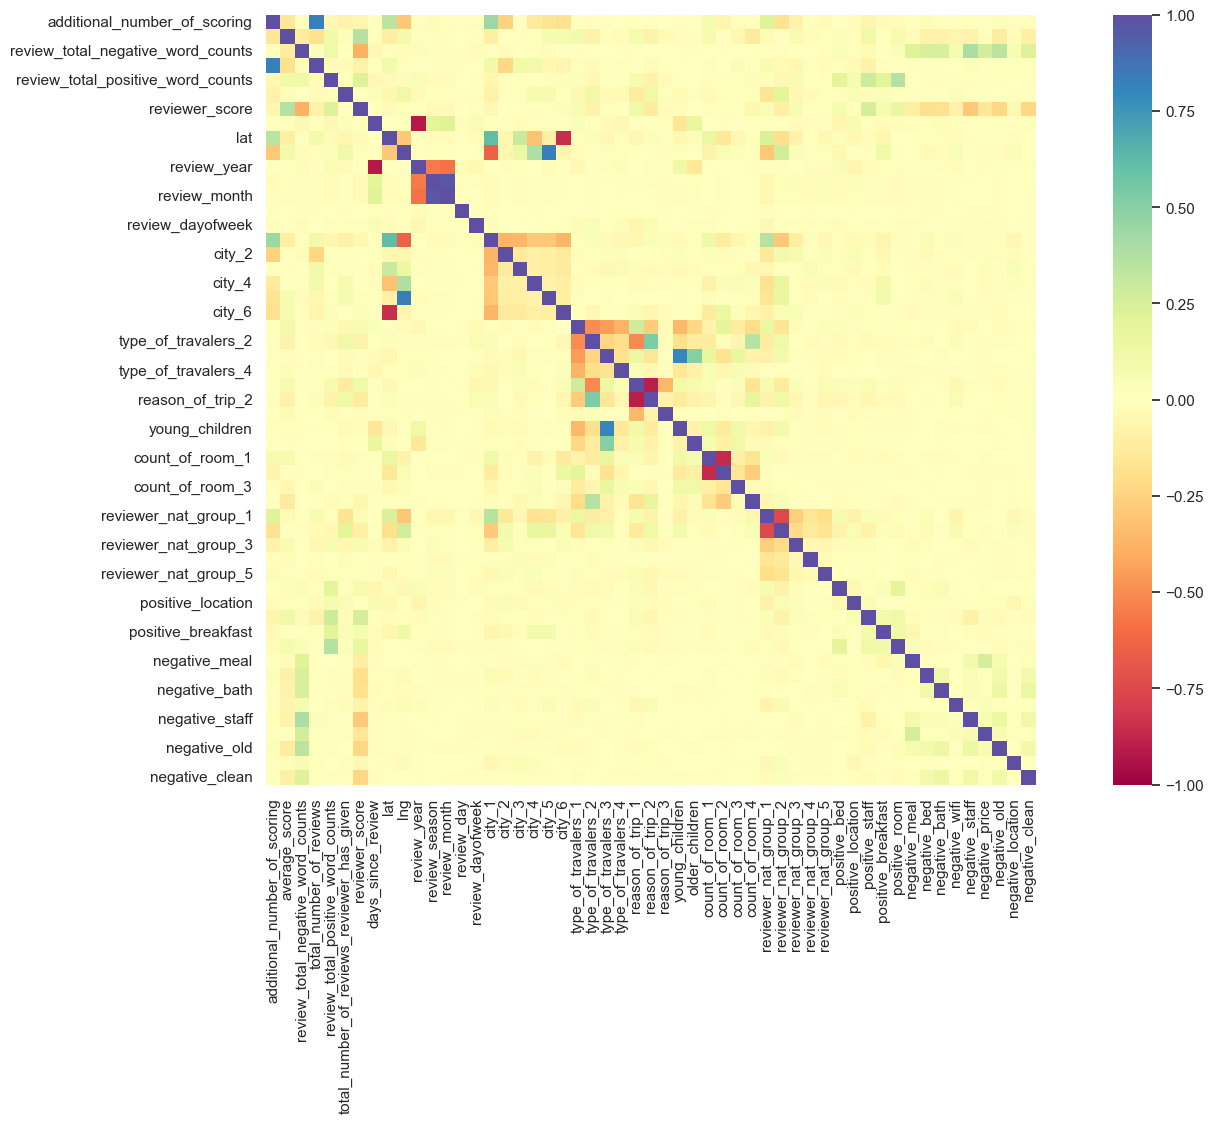

In [49]:
# Построим корреляционную матрицу и оценим данные на предмет наличия мультиколлинеарности
corr = hotels.corr()
sns.set(rc={'figure.figsize':(20, 10)})
ax = sns.heatmap(
    corr, 
    vmin=-1, 
    vmax=1, 
    center=0,
    cmap=sns.color_palette("Spectral", as_cmap=True),
    square=True,
);
print('Наиболее высокая корреляция между признаками:')
corr_unstack = corr.abs().unstack().reset_index()
corr_unstack = corr_unstack.sort_values(by=[0], ascending=False)
mask = corr_unstack['level_0'] != corr_unstack['level_1']
corr_unstack = corr_unstack[mask]
corr_unstack['pr1'] = corr_unstack['level_0'] + corr_unstack['level_1']
corr_unstack['pr1'] = corr_unstack['pr1'].apply(lambda x: ''.join(sorted(list(x))))
corr_unstack = corr_unstack.drop_duplicates(subset=['pr1'])
corr_unstack = corr_unstack.drop(['pr1'], axis=1)
corr_unstack.iloc[:20, :]

In [131]:
# Удалим признаки с корреляцией больше 0.75
hotels.drop(columns = [
    'review_month',
    'days_since_review',
    'reason_of_trip_2',
    'count_of_room_2',
    'city_5',
    'city_6',
    'young_children',
    'reviewer_nat_group_2',
    'total_number_of_reviews'
    ], inplace = True)

hotels.shape

(386803, 44)

Наиболее высокая корреляция между признаками:


,level_0,level_1,0
535,city_1,lng,0.643723
276,lat,city_1,0.610783
404,review_season,review_year,0.560853
897,reason_of_trip_1,type_of_travalers_2,0.508357
986,older_children,type_of_travalers_3,0.506760
764,type_of_travalers_2,type_of_travalers_1,0.502403
808,type_of_travalers_3,type_of_travalers_1,0.447420
12,additional_number_of_scoring,city_1,0.441168
127,review_total_negative_word_counts,negative_staff,0.398262
93,review_total_negative_word_counts,reviewer_score,0.383407


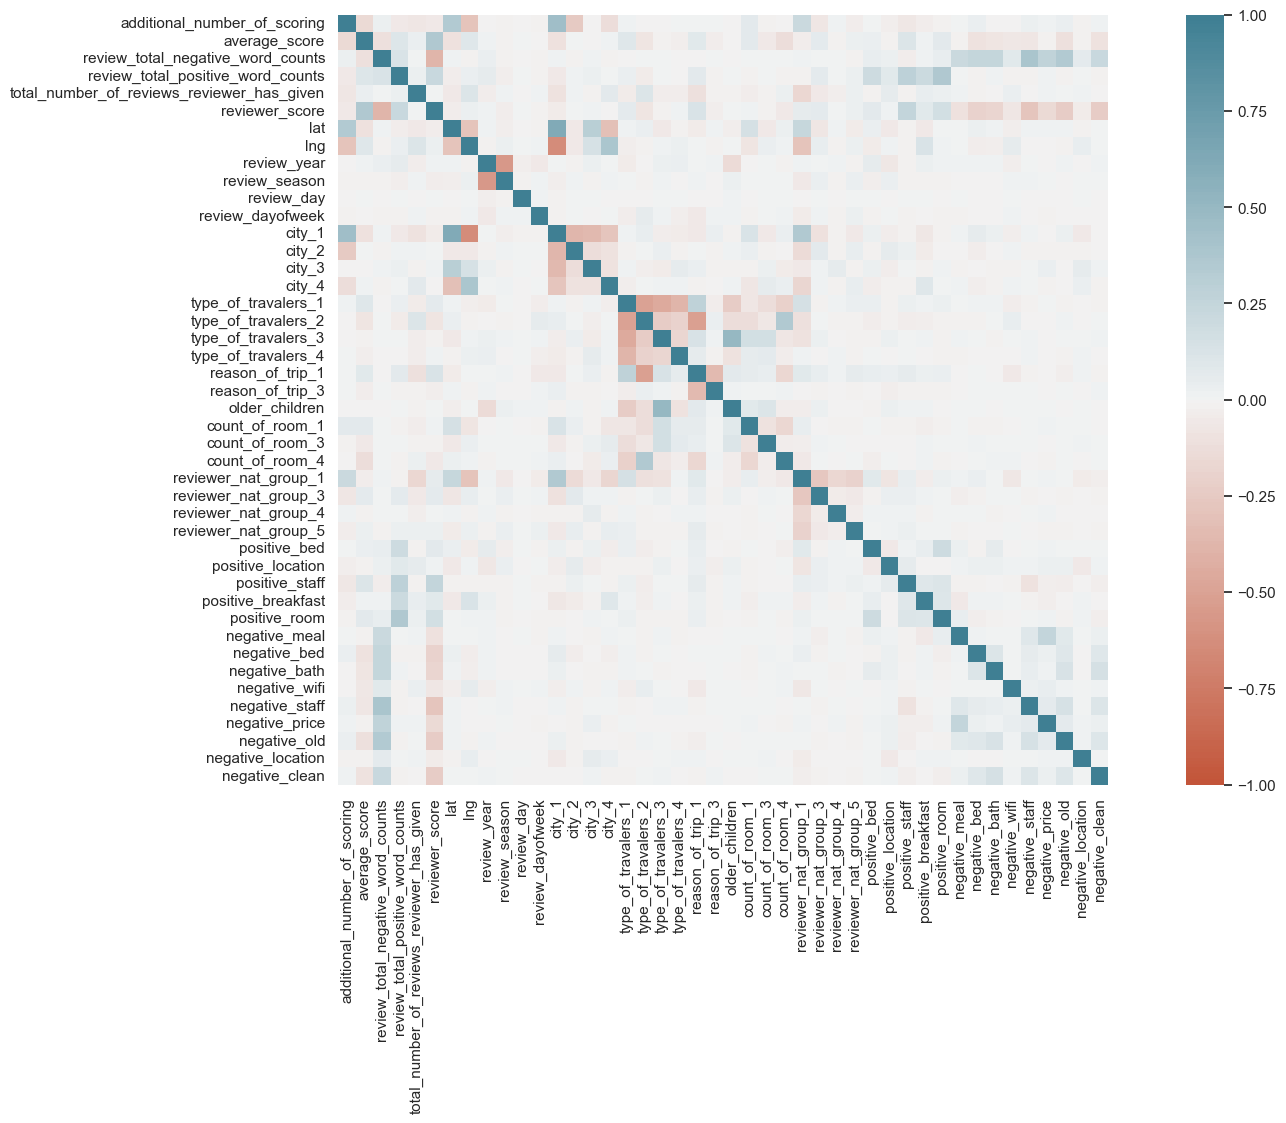

In [132]:
# Построим корреляционную матрицу и оценим данные на предмет наличия мультиколлинеарности
corr = hotels.corr()
sns.set(rc={'figure.figsize':(20, 10)})
ax = sns.heatmap(
    corr, 
    vmin=-1, 
    vmax=1, 
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
);
print('Наиболее высокая корреляция между признаками:')
corr_unstack = corr.abs().unstack().reset_index()
corr_unstack = corr_unstack.sort_values(by=[0], ascending=False)
mask = corr_unstack['level_0'] != corr_unstack['level_1']
corr_unstack = corr_unstack[mask]
corr_unstack['pr1'] = corr_unstack['level_0'] + corr_unstack['level_1']
corr_unstack['pr1'] = corr_unstack['pr1'].apply(lambda x: ''.join(sorted(list(x))))
corr_unstack = corr_unstack.drop_duplicates(subset=['pr1'])
corr_unstack = corr_unstack.drop(['pr1'], axis=1)
corr_unstack.iloc[:20, :]

In [133]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.

In [134]:
# Получим список значений столбцов:
display(X.iloc[0:5, 0:14].columns.tolist())
X.iloc[0:5, 0:14]

['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'lat',
 'lng',
 'review_year',
 'review_season',
 'review_day',
 'review_dayofweek',
 'city_1',
 'city_2',
 'city_3']

,additional_number_of_scoring,average_score,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng,review_year,review_season,review_day,review_dayofweek,city_1,city_2,city_3
0,581,8.4,3,4,7,51.507894,0.143671,2016,1,19,4,1,0,0
1,299,8.3,3,2,14,51.521009,0.123097,2017,1,12,3,1,0,0
2,32,8.9,6,0,14,48.845377,2.325643,2016,4,18,1,0,1,0
3,34,7.5,0,11,8,48.888697,2.394540,2015,3,22,1,0,1,0
4,914,8.5,4,20,10,52.385601,4.847060,2016,1,5,5,0,0,1


In [135]:
# Получим список значений столбцов:
display(X.iloc[0:5, 15:30].columns.tolist())
X.iloc[0:5, 15:30]

['type_of_travalers_1',
 'type_of_travalers_2',
 'type_of_travalers_3',
 'type_of_travalers_4',
 'reason_of_trip_1',
 'reason_of_trip_3',
 'older_children',
 'count_of_room_1',
 'count_of_room_3',
 'count_of_room_4',
 'reviewer_nat_group_1',
 'reviewer_nat_group_3',
 'reviewer_nat_group_4',
 'reviewer_nat_group_5',
 'positive_bed']

,type_of_travalers_1,type_of_travalers_2,type_of_travalers_3,type_of_travalers_4,reason_of_trip_1,reason_of_trip_3,older_children,count_of_room_1,count_of_room_3,count_of_room_4,reviewer_nat_group_1,reviewer_nat_group_3,reviewer_nat_group_4,reviewer_nat_group_5,positive_bed
0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
# Получим список значений столбцов:
display(X.iloc[0:5, 31:44].columns.tolist())
X.iloc[0:5, 31:44]

['positive_staff',
 'positive_breakfast',
 'positive_room',
 'negative_meal',
 'negative_bed',
 'negative_bath',
 'negative_wifi',
 'negative_staff',
 'negative_price',
 'negative_old',
 'negative_location',
 'negative_clean']

,positive_staff,positive_breakfast,positive_room,negative_meal,negative_bed,negative_bath,negative_wifi,negative_staff,negative_price,negative_old,negative_location,negative_clean
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0


In [137]:
# Разделим признаки по типу, перечислим их:

# непрерывные признаки
num_cols = [
    'additional_number_of_scoring',
    'review_total_negative_word_counts',
    'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given', 
    'review_day'
    ]

# категориальные признаки
cat_cols = [
    'average_score', 
    'lat', 
    'lng',
    'review_year',
    'review_season',
    'review_dayofweek',
    'city_1',
    'city_2',
    'city_3',
    'type_of_travalers_1',
    'type_of_travalers_2',
    'type_of_travalers_3',
    'type_of_travalers_4',
    'reason_of_trip_1',
    'reason_of_trip_3',
    'older_children',
    'count_of_room_1',
    'count_of_room_3',
    'count_of_room_4',
    'reviewer_nat_group_1',
    'reviewer_nat_group_3',
    'reviewer_nat_group_4',
    'reviewer_nat_group_5',
    'positive_bed',
    'positive_staff',
    'positive_breakfast',
    'positive_room',
    'negative_meal',
    'negative_bed',
    'negative_bath',
    'negative_wifi',
    'negative_staff',
    'negative_price',
    'negative_old',
    'negative_location',
    'negative_clean'
    ] 

<AxesSubplot: >

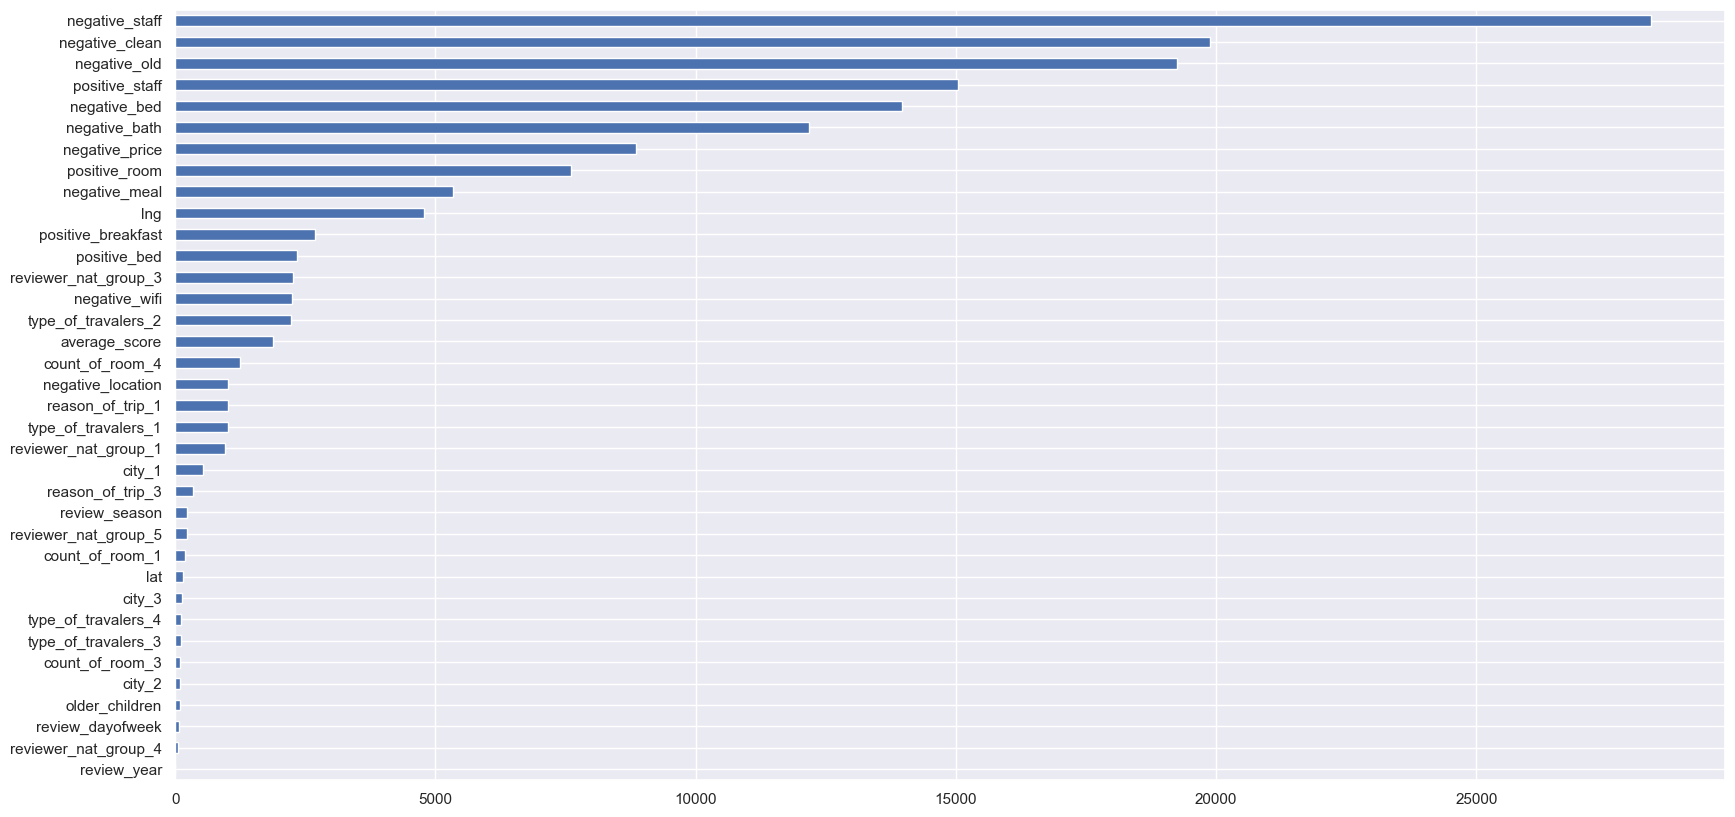

In [138]:
# Для оценки значимости категориальных переменных будем использовать непараметрический тест хи-квадрат, реализованный в
# библиотеке sklearn.feature_selection.chi2. Метод возвращает массив значений хи-квадрат и p-value для каждого признака.
# Используем только значения хи-квадрат и выведем их на графике:

y=y.astype('int')

...
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [139]:
# Удаление категориальных признаков, слабо влияющих на целевую переменную
X.drop([
    'city_1',
    'reason_of_trip_3',
    'review_season',
    'reviewer_nat_group_5',
    'count_of_room_1',
    'lat',
    'city_3',
    'type_of_travalers_4',
    'type_of_travalers_3',
    'count_of_room_3',
    'city_2',
    'older_children',
    'review_dayofweek',
    'reviewer_nat_group_4',
    'review_year'
    ], axis = 1, inplace=True)
X.shape

(386803, 28)

<AxesSubplot: >

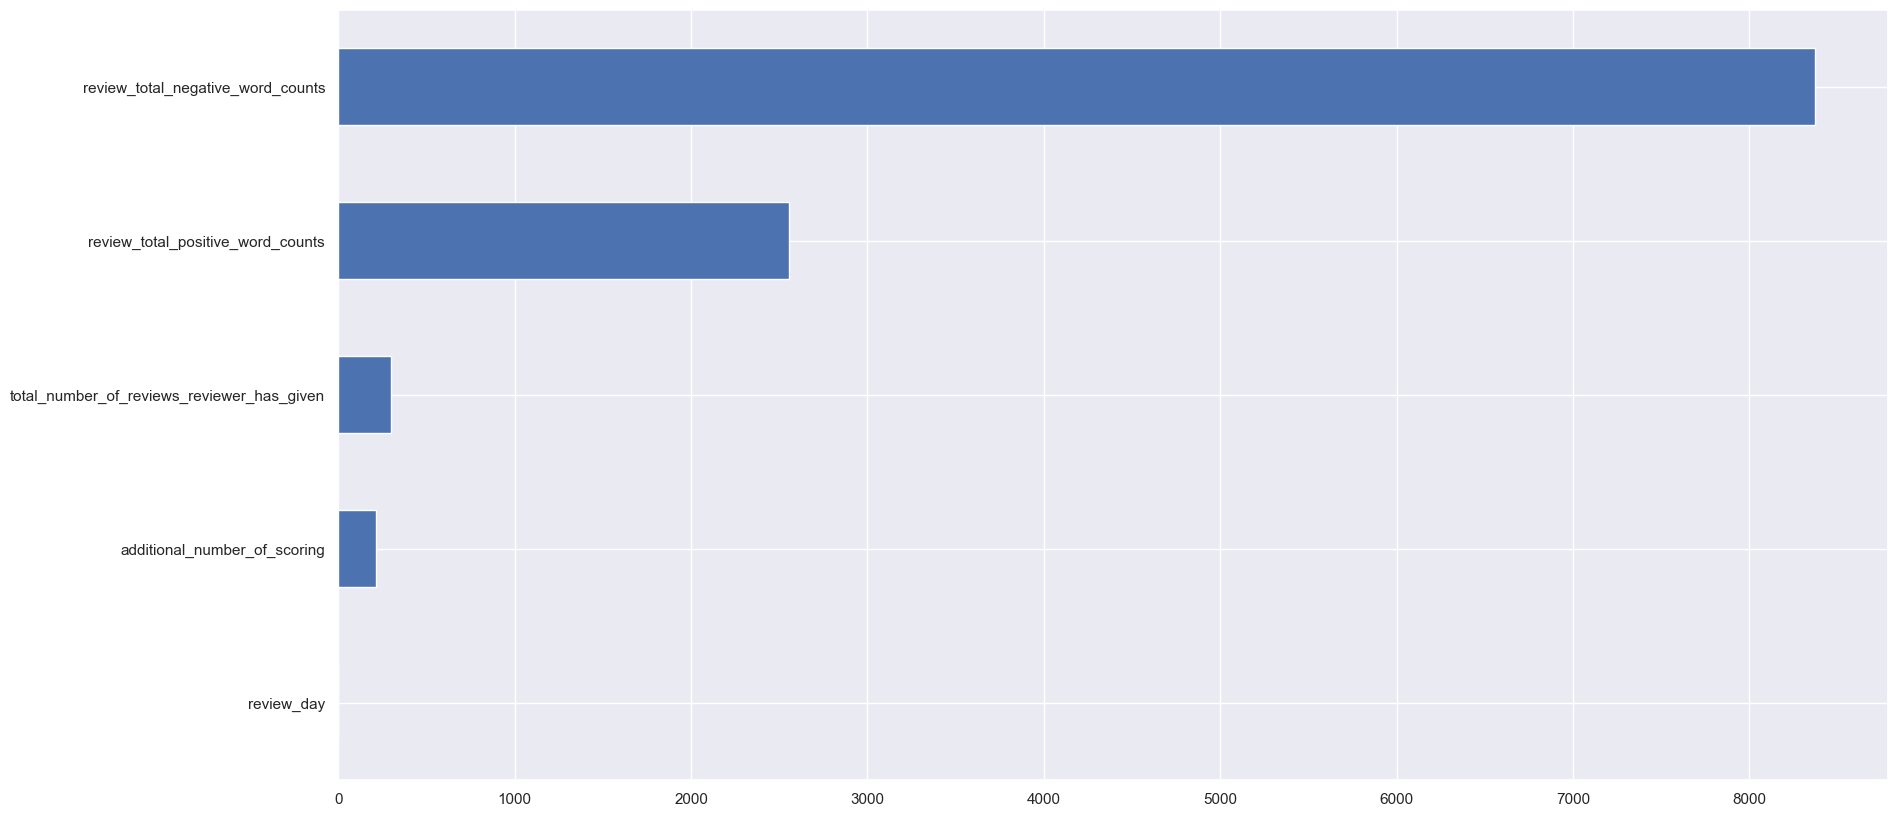

In [140]:
# Для оценки значимости непрерывных переменных будем использовать функцию f_classif из библиотеки sklearn. Метод возвращает двумерный
# массив f-статистик и p-value для каждого признака. В качестве меры значимости мы будем использовать значение f-статистики. Чем значение
# статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей модели.

from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [141]:
# Удаление непрерывных признаков, слабо влияющих на целевую переменную
X.drop([
    'total_number_of_reviews_reviewer_has_given',
    'additional_number_of_scoring',
    'review_day'
    ], axis = 1, inplace=True) 

In [142]:
X.shape

(386803, 25)

In [143]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [144]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [145]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [146]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.15749175919644282
